In [40]:
import numpy as np
import pandas as pd
import src.utils as utils

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Configuration File

In [41]:
config_data = utils.config_load()
config_data

{'raw_dataset_path': 'data/raw/data.csv',
 'data_set_path': 'data/output/data.pkl',
 'input_set_path': 'data/output/input.pkl',
 'output_set_path': 'data/output/output.pkl',
 'input_columns_path': 'data/output/input_columns.pkl',
 'train_set_path': ['data/output/X_train.pkl', 'data/output/y_train.pkl'],
 'test_set_path': ['data/output/X_test.pkl', 'data/output/y_test.pkl'],
 'index_column': 'Unnamed: 0',
 'output_column': 'SeriousDlqin2yrs',
 'seed': 42,
 'test_size': 0.2}

# Load Data

In [42]:
X_train = utils.pickle_load(config_data['train_set_path'][0])
y_train = utils.pickle_load(config_data['train_set_path'][1])

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (120000, 10)
y_train shape: (120000,)


In [43]:
data = pd.concat((X_train, y_train), axis=1)
data.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
104026,0.000000,29,0,0.011513,4342.0,5,0,0,0,0.0,0
5416,0.595526,55,0,0.835333,1833.0,11,0,1,0,0.0,0
75613,0.000000,43,0,0.043437,4166.0,2,0,0,0,4.0,0
138170,0.391980,40,0,0.059771,9000.0,2,0,0,0,5.0,0
87185,0.000000,35,0,0.133598,5800.0,12,0,1,0,0.0,0


# EDA

### check data type

In [44]:
# Check datatype
data.dtypes

RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
SeriousDlqin2yrs                          int64
dtype: object

### check missing value

In [45]:
# Check missing value
data.isna().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           23689
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3127
SeriousDlqin2yrs                            0
dtype: int64

In [46]:
data[data['NumberOfDependents'].isna()]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
98486,0.008779,78,0,1512.0,NaN,13,0,1,0,NaN,0
48569,0.832168,60,0,443.0,NaN,3,2,0,0,NaN,1
143959,0.000000,71,0,0.0,NaN,2,0,0,0,NaN,0
49823,0.000000,24,0,0.0,NaN,1,0,0,0,NaN,0
48679,0.036041,76,0,24.0,NaN,4,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
116382,0.000000,75,0,1410.0,NaN,4,0,2,0,NaN,0
70272,0.045268,55,0,41.0,NaN,4,0,0,0,NaN,0
55681,0.088403,40,0,3057.0,NaN,6,0,2,0,NaN,0
12667,0.183508,57,0,3061.0,NaN,4,0,1,0,NaN,0


In [47]:
data[data['MonthlyIncome'].isna()]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
93439,0.322778,69,0,2754.0,NaN,17,0,1,0,1.0,0
98486,0.008779,78,0,1512.0,NaN,13,0,1,0,NaN,0
24684,0.090233,55,0,4641.0,NaN,17,0,2,0,0.0,0
69363,0.000000,69,0,602.0,NaN,2,0,1,0,0.0,0
31505,0.009997,39,0,315.0,NaN,5,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
123856,0.055973,37,0,2987.0,NaN,9,0,1,0,3.0,0
84479,0.000000,74,0,0.0,NaN,1,0,0,0,0.0,0
126325,0.005531,45,0,3157.0,NaN,6,0,1,0,0.0,0
54887,0.001243,66,0,396.0,NaN,4,0,0,0,0.0,0


**Summary**

`MonthlyIncome` and `NumberOfDependents` punya missing value

### Visualize distribution

In [48]:
data.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs'],
      dtype='object')

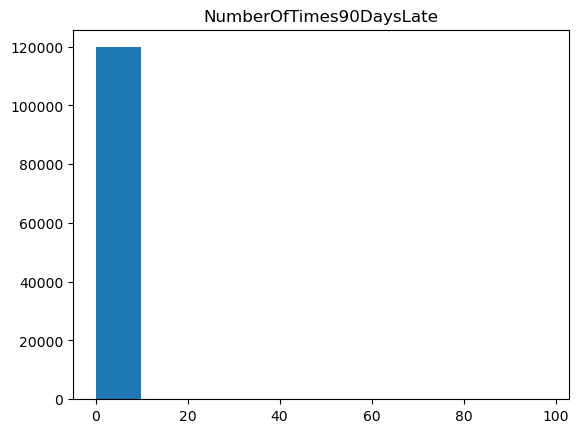

In [49]:
col = 'NumberOfTimes90DaysLate'

plt.hist(data[col])
plt.title(col)
plt.show()

In [50]:
data[data[col]==98]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
28292,1.0,45,98,0.000000,2950.0,0,98,0,98,2.0,0
79747,1.0,33,98,0.000000,3350.0,0,98,0,98,1.0,1
71628,1.0,24,98,0.000000,NaN,0,98,0,98,NaN,1
10202,1.0,23,98,0.000000,1.0,0,98,0,98,0.0,0
141072,1.0,24,98,0.000000,750.0,0,98,0,98,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
31779,1.0,30,98,49.000000,NaN,0,98,0,98,2.0,0
112218,1.0,24,98,0.000000,NaN,0,98,0,98,0.0,0
141889,1.0,40,98,0.010939,3290.0,0,98,0,98,3.0,1
33592,1.0,29,98,0.000000,1854.0,0,98,0,98,0.0,0


In [51]:
data[data[col]==98]['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

98    212
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [52]:
data[data[col]==98]['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

98    212
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [53]:
data[data[col]==96]['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

96    3
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [54]:
data[data[col]==96]['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

96    3
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

**Kesimpulan**

pada kolom 
- `NumberOfTime30-59DaysPastDueNotWorse`, 
- `NumberOfTime60-89DaysPastDueNotWorse`, dan 
- `NumberOfTimes90DaysLate` 

data yang nilainya 96 & 98 di drop

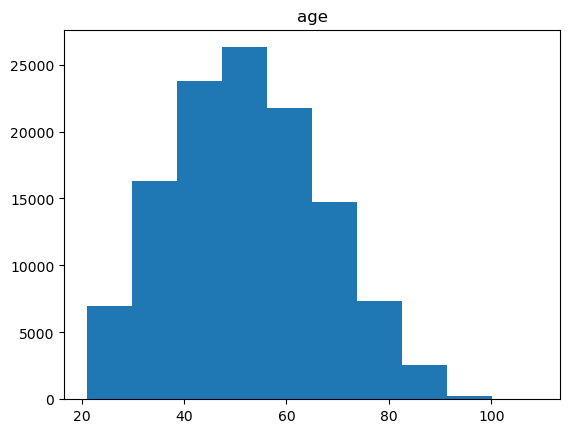

In [55]:
col = 'age'

plt.hist(data[col])
plt.title(col)
plt.show()

**Kesimpulan**

gak ada masalah sama usia

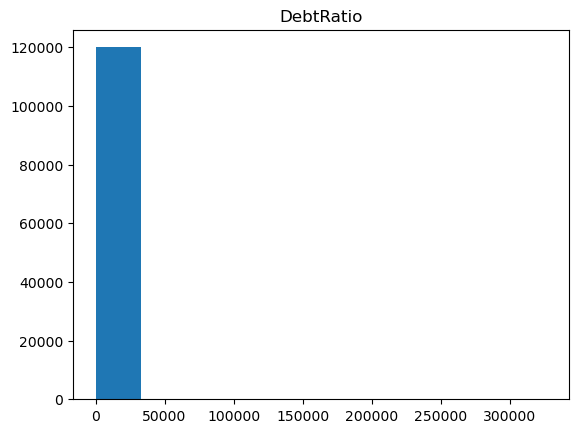

In [56]:
col = 'DebtRatio'

plt.hist(data[col])
plt.title(col)
plt.show()

Debt ratio = monthly debt payments by montly gross income

In [57]:
data[col].describe()

count    120000.000000
mean        351.040018
std        1941.106682
min           0.000000
25%           0.175554
50%           0.367165
75%           0.866549
max      326442.000000
Name: DebtRatio, dtype: float64

In [58]:
data[data[col]>10000.0]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
40758,0.413105,69,1,11902.0,0.0,23,0,3,0,0.0,0
34780,0.026228,50,0,12018.0,0.0,16,0,3,0,0.0,0
124868,0.197821,57,0,18230.0,NaN,19,0,8,0,0.0,0
62734,0.342288,64,0,17687.0,NaN,16,0,9,0,0.0,0
91,0.039388,51,0,15466.0,0.0,7,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
144342,0.000000,60,0,36705.0,NaN,7,0,0,0,0.0,0
105849,1.000000,61,1,10063.0,NaN,7,0,4,0,0.0,0
116740,0.000000,48,2,11693.0,NaN,14,0,8,0,2.0,0
41428,0.032840,54,1,15588.0,NaN,19,0,4,0,0.0,0


**Kesimpulan**

no problemo

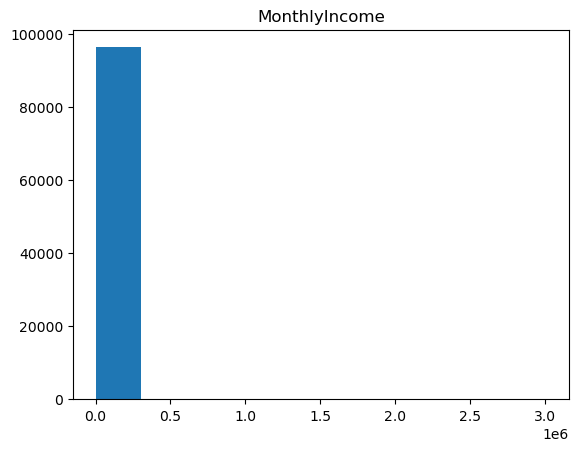

In [59]:
col = 'MonthlyIncome'

plt.hist(data[col])
plt.title(col)
plt.show()

In [60]:
data[col].describe()

count    9.631100e+04
mean     6.678384e+03
std      1.529405e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.250000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [61]:
data[data[col]>100_000]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
99602,0.190132,50,0,0.015973,237400.0,10,0,2,0,3.0,0
35974,0.439684,64,0,0.004003,582369.0,11,0,0,0,1.0,0
117421,0.828866,35,0,0.017841,114344.0,11,0,2,0,2.0,0
96550,0.064155,52,0,0.003698,699530.0,11,0,2,0,1.0,0
119137,0.151329,49,0,0.001313,649587.0,8,0,0,1,3.0,0
90029,0.385876,57,0,0.018196,173000.0,5,0,2,0,1.0,0
117818,0.006899,48,0,0.017707,150000.0,8,0,0,0,4.0,0
124636,0.036010,43,0,0.002557,428250.0,13,0,1,0,1.0,0
73764,0.007328,52,0,0.001470,3008750.0,10,0,1,0,3.0,0
34771,0.375783,62,0,0.022712,250000.0,15,0,2,0,0.0,1


**Kesimpulan**

- data skew
- imputasi dengan median

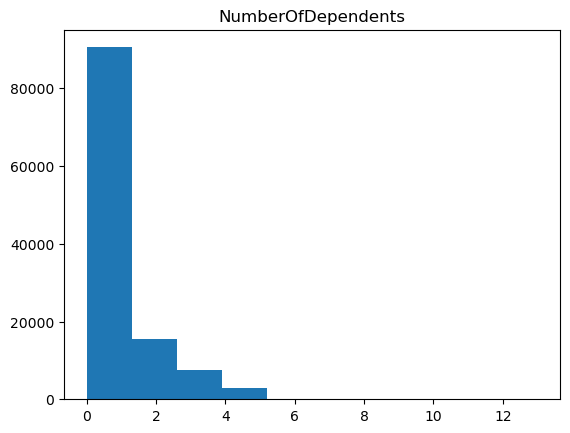

In [62]:
col = 'NumberOfDependents'

plt.hist(data[col])
plt.title(col)
plt.show()

**Kesimpulan**

untuk data yang missing, kita anggap gak punya tanggungan.
kasih 0

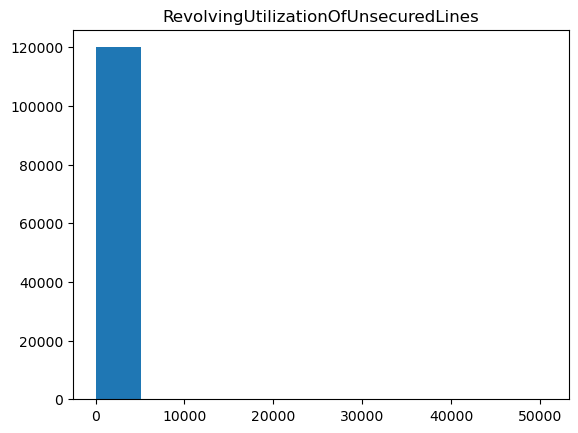

In [63]:
col = 'RevolvingUtilizationOfUnsecuredLines'

plt.hist(data[col])
plt.title(col)
plt.show()

(array([57190., 14642.,  9717.,  7532.,  5983.,  5256.,  5784., 12613.,
          488.,   187.]),
 array([0.        , 0.135097  , 0.270194  , 0.40529101, 0.54038801,
        0.67548501, 0.81058201, 0.94567901, 1.08077601, 1.21587302,
        1.35097002]),
 <BarContainer object of 10 artists>)

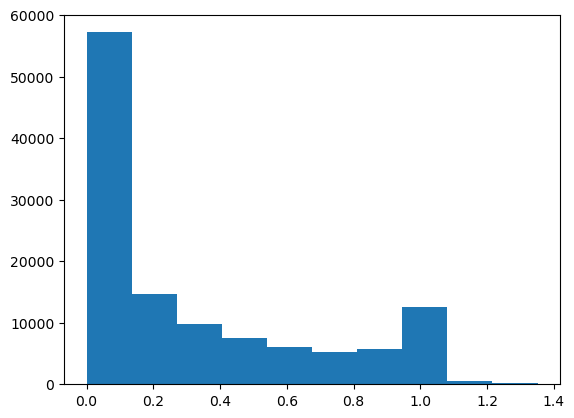

In [64]:
q1, q3 = np.quantile(data[col], q=(0.25, 0.75))
iqr = q3 - q1
ub = q3 + 1.5*iqr
lb = q1 - 1.5*iqr

plt.hist(data[(data[col]>=lb) & (data[col]<= ub)][col])

In [65]:
ub, lb

(1.352113468125, -0.763112260875)

**Kesimpulan**

remove data outlier